## 1. Import Module & Data Preparation

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_feather('final_full_dataset.feather')
X_train = df.drop(['is_duplicate'],  axis=1)
y_train = df['is_duplicate']

# 2. Drop non number features & unecessary columns

In [67]:
X_train.drop(columns = ['index', 'qid1', 'qid2', 'level_0', 'q1_Assessment/Word/Home', 'q1_Best/Way/Visit',
       'q1_Country/Car/Show/Television', 'q1_Engine/Password/Search', 'q1_English/Law/Writing', 'q1_Food/Health',
       'q1_Free/Ocatopm/Software/Website', 'q1_India/Government/China', 'q1_Interview/Difference/Drug', 'q1_Job/College/University',
       'q1_Language/Relationship', 'q1_Long/Review/Work/Compare', 'q1_Lose/Weight/Time/Travel/Salary', 'q1_Money/Bank/Online',
       'q1_Movie/Video Game/Youtube', 'q1_Politics/Trump/Election', 'q1_Problem/Increase', 'q1_Purpose/Energy',
       'q1_Quora/Question/Google/Answer', 'q1_Relationship/Girl/Guy/People/Life', 'q1_Self-help/Learn/Business',
       'q1_Sex/Woman/Man', 'q1_Social Media/Gadget/Email', 'q1_United States/Day', 'q1_Year/New/Stock/Company',
       'q2_Assessment/Word/Home', 'q2_Best/Way/Visit', 'q2_Country/Car/Show/Television', 'q2_Engine/Password/Search',
       'q2_English/Law/Writing', 'q2_Food/Health', 'q2_Free/Ocatopm/Software/Website', 'q2_India/Government/China',
       'q2_Interview/Difference/Drug', 'q2_Job/College/University','q2_Language/Relationship', 'q2_Long/Review/Work/Compare',
       'q2_Lose/Weight/Time/Travel/Salary', 'q2_Money/Bank/Online', 'q2_Movie/Video Game/Youtube', 'q2_Politics/Trump/Election',
       'q2_Problem/Increase', 'q2_Purpose/Energy', 'q2_Quora/Question/Google/Answer', 'q2_Relationship/Girl/Guy/People/Life', 'q2_Self-help/Learn/Business',
       'q2_Sex/Woman/Man', 'q2_Social Media/Gadget/Email', 'q2_United States/Day', 'q2_Year/New/Stock/Company'], inplace = True)
X_train_num =X_train.select_dtypes(include=[np.number])
X_train_num

,length_diff,same_question,lc_substring,lc_subsequence,jaccard_dist,common_words,common_ratio,levenshtein,fuzz_qratio,fuzz_wratio,...,freq_q2,diff_sen_positive,exactly_same,diff_tfidf_L1_norm,Levenshtein,diff_tfidf_L2,freq_q1,q1_word_to_vec,length_diff_rate,diff_sen_negative
0,9,0,56,56,0.862069,11,0.090909,0.925620,93,95,...,1,0.038,0,0.009526,0.926829,0.042969,1,0.174022,0.157895,0.000
1,-37,0,26,41,0.200000,4,0.031008,0.635659,66,86,...,1,0.213,0,0.048654,0.647482,0.500491,4,0.010476,0.734694,0.000
2,14,0,10,36,0.154472,4,0.026667,0.480000,54,63,...,1,0.097,0,0.086000,0.545455,1.490645,1,0.408233,0.560000,0.000
3,-15,0,2,18,0.000000,0,0.000000,0.349515,35,35,...,1,0.340,0,0.177178,0.278261,2.000000,1,-0.102907,0.622951,0.472
4,37,0,6,25,0.084211,4,0.036036,0.450450,46,86,...,1,0.000,0,0.098917,0.452174,1.479872,3,0.038413,0.696629,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,6,0,31,74,0.707865,11,0.067901,0.913580,91,92,...,2,0.000,0,0.024167,0.878049,0.539067,2,-0.018673,0.036364,0.000
404283,-1,0,26,29,0.431373,5,0.061728,0.716049,72,75,...,2,0.364,0,0.128249,0.722892,0.692961,20,-0.009346,0.181818,0.155
404284,0,0,5,12,0.045455,1,0.032258,0.774194,75,75,...,1,0.000,0,0.119396,0.764706,0.419990,1,0.126892,0.222222,0.000
404285,-33,0,5,45,0.009852,1,0.004630,0.416667,42,46,...,1,0.072,0,0.113016,0.398190,1.983526,1,0.182768,0.231884,0.167


# 3. Scale Data

In [70]:
#Scale data
sc = StandardScaler()
sc.fit(X_train_num)
column_name = X_train_num.columns.tolist()

X_train_num_scaled = X_train_num.copy()
X_train_num_scaled[column_name] = StandardScaler().fit_transform(X_train[column_name])
X_train_num_scaled

,length_diff,same_question,lc_substring,lc_subsequence,jaccard_dist,common_words,common_ratio,levenshtein,fuzz_qratio,fuzz_wratio,...,freq_q2,diff_sen_positive,exactly_same,diff_tfidf_L1_norm,Levenshtein,diff_tfidf_L2,freq_q1,q1_word_to_vec,length_diff_rate,diff_sen_negative
0,0.293910,0.0,2.596148,1.288204,2.550073,1.926413,1.714478,1.655897,1.689814,1.209869,...,-0.272295,-0.472251,-0.232296,-1.676947,1.689651,-1.789209,-0.296512,1.219055,-0.610788,-0.424734
1,-1.118599,0.0,0.530500,0.391816,-0.365884,-0.344327,-0.654673,0.079432,0.220315,0.621220,...,-0.272295,0.521236,-0.232296,-0.876364,0.187180,-0.949390,0.038153,-0.213042,1.260457,-0.424734
2,0.447443,0.0,-0.571179,0.093020,-0.566405,-0.344327,-0.826367,-0.766857,-0.432796,-0.883107,...,-0.272295,-0.137304,-0.232296,-0.112251,-0.361575,0.868122,-0.296512,3.269941,0.693717,-0.424734
3,-0.443051,0.0,-1.122019,-0.982647,-1.246746,-1.641892,-1.881057,-1.476283,-1.466888,-2.714462,...,-0.272295,1.242223,-0.232296,1.753274,-1.798678,1.803085,-0.296512,-1.205890,0.897942,3.176844
4,1.153698,0.0,-0.846599,-0.564332,-0.875857,-0.344327,-0.455800,-0.927513,-0.868203,0.621220,...,-0.272295,-0.687979,-0.232296,0.152026,-0.863285,0.848347,-0.073402,0.031583,1.136968,-0.424734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,0.201790,0.0,0.874774,2.363871,1.870912,1.926413,0.804497,1.590440,1.580962,1.013653,...,-0.181914,-0.687979,-0.232296,-1.377375,1.427285,-0.878580,-0.184957,-0.468291,-1.005058,-0.424734
404283,-0.013157,0.0,0.530500,-0.325295,0.653153,-0.019935,0.560355,0.516501,0.546870,-0.098241,...,-0.181914,1.378472,-0.232296,0.752176,0.592771,-0.596094,1.823033,-0.386614,-0.533176,0.757987
404284,0.017549,0.0,-0.915454,-1.341202,-1.046550,-1.317501,-0.605222,0.832620,0.710148,-0.098241,...,-0.272295,-0.687979,-0.232296,0.571031,0.817670,-1.097155,-0.296512,0.806359,-0.402098,-0.424734
404285,-0.995772,0.0,-0.915454,0.630853,-1.203354,-1.317501,-1.697951,-1.111189,-1.085907,-1.995001,...,-0.272295,-0.279231,-0.232296,0.440499,-1.153638,1.772847,-0.296512,1.295639,-0.370753,0.849553


# 4. Random Forest (Importance Feature)

In [71]:
feature_list = list(X_train_num_scaled.columns)
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train_num_scaled, y_train)

importances = forest.feature_importances_
#Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_train_num_scaled.columns[0:]

for f in range(X_train_num_scaled.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) freq_q2                        0.073581
 2) freq_q1                        0.060164
 3) freq_q1+q2                     0.056206
 4) diff_tfidf_L2                  0.046648
 5) jaccard_dist                   0.045619
 6) Levenshtein                    0.045091
 7) diff_tfidf_L1                  0.036615
 8) levenshtein                    0.034534
 9) fuzz_qratio                    0.033152
10) common_ratio                   0.030023
11) dist_canberra                  0.029816
12) dist_cosine                    0.023554
13) diff_tfidf_L2_norm             0.022511
14) dist_minkowski                 0.020269
15) wmdistance                     0.019702
16) dist_cityblock                 0.019356
17) lc_substring                   0.019250
18) diff_tfidf_L1_norm             0.018833
19) dist_euclidean                 0.016831
20) length_diff_rate               0.016815
21) q2_vec_2                       0.016704
22) q1_vec_2                       0.016063
23) total_length                

# 5. Visualize features cumulative importance

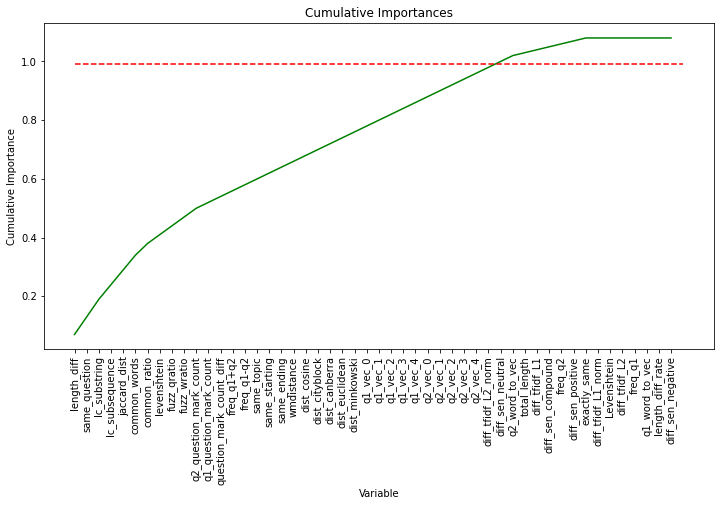

In [72]:
#List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
#List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

plt.rcParams["figure.figsize"] = (12,6)
x_values = list(range(len(importances)))
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, feat_labels, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

# 6. Find the Numbers of Feature needed to reach 95% cumulative importance

In [73]:
num = np.where(cumulative_importances > 0.95)[0][0] + 1

# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num]]

# Create training and testing sets with only the important features
important_train_features = X_train_num_scaled[important_feature_names]
#important_test_features = X_val[important_feature_names]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
#print('Important test features shape:', important_test_features.shape)
important_train_features.columns

Important train features shape: (404287, 34)


Index(['freq_q2', 'freq_q1+q2', 'freq_q1', 'jaccard_dist', 'Levenshtein',
       'diff_tfidf_L2', 'diff_tfidf_L1', 'common_ratio', 'levenshtein',
       'fuzz_qratio', 'dist_canberra', 'length_diff', 'lc_substring',
       'lc_subsequence', 'freq_q1-q2', 'same_ending', 'wmdistance',
       'dist_cosine', 'dist_cityblock', 'dist_euclidean', 'dist_minkowski',
       'q1_vec_0', 'q1_vec_1', 'q1_vec_2', 'q1_vec_3', 'q1_vec_4', 'q2_vec_0',
       'q2_vec_1', 'q2_vec_2', 'q2_vec_3', 'q2_vec_4', 'diff_tfidf_L2_norm',
       'q2_word_to_vec', 'total_length'],
      dtype='object')